In [218]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from seaborn import clustermap


<h3>Drop DeepSEA corelated features</h3>

In [219]:
#data_ds = pd.read_csv('../data/data_model/data_noncoding.nctools-predictions.eqtls.deepsea_features-c0.8_preprocessed.txt', sep='\t')
data = pd.read_csv('../data/data_model/data_noncoding.nctools-predictions.eqtls_preprocessed.txt', sep='\t')
data['#Chrom'] = data['#Chrom'].astype(str)

In [220]:
data.shape

(88892, 167)

In [221]:
deepsea = pd.read_csv('../data/nctools_predictions/deepsea_jobs/infile.vcf.out.diff')

In [222]:
deepsea = deepsea.drop(columns='name')
deepsea.head()

,Unnamed: 0,chr,pos,ref,alt,8988T|DNase|None,AoSMC|DNase|None,Chorion|DNase|None,CLL|DNase|None,Fibrobl|DNase|None,...,NHLF|H4K20me1|None,Osteoblasts|H2AZ|None,Osteoblasts|H3K27ac|None,Osteoblasts|H3K27me3|None,Osteoblasts|H3K36me3|None,Osteoblasts|H3K4me1|None,Osteoblasts|H3K4me2|None,Osteoblasts|H3K4me3|None,Osteoblasts|H3K79me2|None,Osteoblasts|H3K9me3|None
0,72601,chr8,145008443,A,T,0.307200,0.40128,0.293940,0.103880,0.349620,...,-0.000456,0.021936,0.245320,-0.011816,-0.014632,0.133170,0.136760,0.132400,-0.036714,-0.000002
1,40518,chr19,11200088,C,T,-0.200720,-0.30831,-0.239510,-0.283600,-0.254910,...,0.000253,-0.033300,-0.102810,0.145100,0.002163,0.004693,-0.064505,-0.068784,0.026863,0.001990
2,40514,chr19,11200085,C,T,-0.184250,-0.35034,-0.241270,-0.261720,-0.251230,...,0.000075,-0.042771,-0.079919,0.147930,0.001648,0.003962,-0.077612,-0.085688,0.020718,0.001994
3,73328,chr9,35657869,C,T,-0.070747,-0.12365,-0.076955,-0.064465,-0.092453,...,0.001067,-0.008705,-0.013970,0.010824,0.002013,0.049318,-0.005916,-0.008385,0.015808,0.000575
4,67927,chr6,152702540,C,T,-0.260700,-0.39078,-0.218990,-0.004290,-0.431780,...,0.002404,0.018052,-0.163380,0.022624,0.043326,-0.121370,-0.151580,-0.080698,0.065896,-0.000502


In [223]:
deepsea = deepsea.rename(columns={'chr': '#Chrom', 'pos': 'Pos', 'ref': 'Ref', 'alt': 'Alt'})
deepsea['#Chrom'] = deepsea['#Chrom'].apply(lambda x: x[3:])

In [224]:
deepsea.head()

,Unnamed: 0,#Chrom,Pos,Ref,Alt,8988T|DNase|None,AoSMC|DNase|None,Chorion|DNase|None,CLL|DNase|None,Fibrobl|DNase|None,...,NHLF|H4K20me1|None,Osteoblasts|H2AZ|None,Osteoblasts|H3K27ac|None,Osteoblasts|H3K27me3|None,Osteoblasts|H3K36me3|None,Osteoblasts|H3K4me1|None,Osteoblasts|H3K4me2|None,Osteoblasts|H3K4me3|None,Osteoblasts|H3K79me2|None,Osteoblasts|H3K9me3|None
0,72601,8,145008443,A,T,0.307200,0.40128,0.293940,0.103880,0.349620,...,-0.000456,0.021936,0.245320,-0.011816,-0.014632,0.133170,0.136760,0.132400,-0.036714,-0.000002
1,40518,19,11200088,C,T,-0.200720,-0.30831,-0.239510,-0.283600,-0.254910,...,0.000253,-0.033300,-0.102810,0.145100,0.002163,0.004693,-0.064505,-0.068784,0.026863,0.001990
2,40514,19,11200085,C,T,-0.184250,-0.35034,-0.241270,-0.261720,-0.251230,...,0.000075,-0.042771,-0.079919,0.147930,0.001648,0.003962,-0.077612,-0.085688,0.020718,0.001994
3,73328,9,35657869,C,T,-0.070747,-0.12365,-0.076955,-0.064465,-0.092453,...,0.001067,-0.008705,-0.013970,0.010824,0.002013,0.049318,-0.005916,-0.008385,0.015808,0.000575
4,67927,6,152702540,C,T,-0.260700,-0.39078,-0.218990,-0.004290,-0.431780,...,0.002404,0.018052,-0.163380,0.022624,0.043326,-0.121370,-0.151580,-0.080698,0.065896,-0.000502


In [225]:
merged = data.merge(deepsea, how='left', on=['#Chrom', 'Pos', 'Ref', 'Alt'])

In [226]:
merged.shape

(88892, 1087)

In [229]:
merged.to_csv('../data/data_model/data_noncoding.nctools-predictions.eqtls.deepsea-features.txt', sep='\t', index=False)

In [228]:
# print(data.shape, data.dropna(subset=features).shape)

In [230]:
deepsea_corr = merged[deepsea_features].corr()

In [231]:
corr_matrix = deepsea_corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [232]:
# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [233]:
len(to_drop)

669

In [234]:
merged = merged.drop(columns=to_drop)

In [235]:
merged.shape

(88892, 418)

In [236]:
#merge data again with filtered deepsea features. 

In [237]:
data = merged

<h3>Select top20 DeepSEA features by Wilcoxon p-value</h3>

In [238]:
data = pd.read_csv('../data/data_model/data_noncoding.nctools-predictions.eqtls.deepsea-features.txt', sep='\t')

//anaconda3/envs/py3_vp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,4,5,6,19,25,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,90,92,93,96,97,98,99,100,101,102,103,104,105,108,109,114,115,117,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [239]:
#Deepsea feature selection:
#first filtered out highly correlated (0.9) columns (reduced features from 919 to 459)
#then used top 20 of wilcoxon test.


In [240]:
import sys
sys.path.insert(1, '../code/model_scripts/')
from features import deepsea_features
import scipy

l = []
for feature in list(set(deepsea_features).intersection(data.columns)):
    w = scipy.stats.ranksums(x=data.loc[data['label'] == 'Benign'][feature].tolist(), y=data.loc[data['label'] == 'Pathogenic'][feature].tolist())
    l.append([feature, w[0], w[1]])

l = sorted(l, key=lambda x: abs(x[1]), reverse=True)


In [241]:
l[0:20]

[['SH-SY5Y|GATA-2|None', -9.740756281454942, 2.0204501748766753e-22],
 ['K562|H3K36me3|None', 9.576764006941934, 1.00133126150515e-21],
 ['HepG2|Pol2(phosphoS2)|None', 9.41264971833769, 4.837842485415306e-21],
 ['NHDF-Ad|H3K36me3|None', 9.285504276472789, 1.609432298850488e-20],
 ['SK-N-SH_RA|p300|None', -9.23875936193368, 2.4937176415456885e-20],
 ['MCF-7|DNase|Hypoxia_LacAcid', 9.045398331233034, 1.4912048387256643e-19],
 ['NHLF|H4K20me1|None', 9.0311031176168, 1.699498528766523e-19],
 ['SK-N-SH_RA|DNase|None', -9.013702414156596, 1.9921476543010945e-19],
 ['SH-SY5Y|GATA3|None', -8.99229979079437, 2.4211026152119565e-19],
 ['NHEK|H3K27me3|None', -8.984437530023303, 2.6006105701270613e-19],
 ['H1-hESC|Pol2-4H8|None', 8.954930752064824, 3.39948936283288e-19],
 ['HepG2|Pol2|None.2', 8.949230950945704, 3.579675072001726e-19],
 ['HepG2|Pol2|None', 8.83263030122797, 1.0224251194477775e-18],
 ['GM12878|ZEB1|None', 8.743250888546896, 2.264969535088589e-18],
 ['Dnd41|EZH2|None', -8.7372085230

In [242]:
top20_deepsea_features = [x[0] for x in l[0:20]]
print(top20_deepsea_features)

['SH-SY5Y|GATA-2|None', 'K562|H3K36me3|None', 'HepG2|Pol2(phosphoS2)|None', 'NHDF-Ad|H3K36me3|None', 'SK-N-SH_RA|p300|None', 'MCF-7|DNase|Hypoxia_LacAcid', 'NHLF|H4K20me1|None', 'SK-N-SH_RA|DNase|None', 'SH-SY5Y|GATA3|None', 'NHEK|H3K27me3|None', 'H1-hESC|Pol2-4H8|None', 'HepG2|Pol2|None.2', 'HepG2|Pol2|None', 'GM12878|ZEB1|None', 'Dnd41|EZH2|None', 'MCF-7|Pol2|None', 'K562|Pol2(phosphoS2)|None.1', 'NH-A|H3K36me3|None', 'HeLa-S3|ZZZ3|None', 'Monocytes-CD14+RO01746\xa0|H3K27me3|None']


In [172]:
# top20_deepsea_features = [x[0] for x in l[0:20]]
top20_deepsea_features = ['SH-SY5Y|GATA-2|None', 'K562|H3K36me3|None', 'HepG2|Pol2(phosphoS2)|None', 'SK-N-SH_RA|p300|None', 'NHLF|H4K20me1|None', 'NHEK|H3K27me3|None', 'GM12878|ZEB1|None', 'Dnd41|EZH2|None', 'K562|Pol2(phosphoS2)|None.1', 'HeLa-S3|ZZZ3|None', 'Monocytes-CD14+RO01746\xa0|H3K27me3|None', 'GM12878|TR4|None', 'HepG2|EZH2|None', 'HUVEC|GATA-2|None', 'NHEK|H3K9me1|None', 'H1-hESC|H3K36me3|None', 'PFSK-1|Sin3Ak-20|None', 'HeLa-S3|ZKSCAN1|None', 'HUVEC|c-Fos|None', 'NHDF-Ad|H2AZ|None']

In [243]:
print(top20_deepsea_features)

['SH-SY5Y|GATA-2|None', 'K562|H3K36me3|None', 'HepG2|Pol2(phosphoS2)|None', 'NHDF-Ad|H3K36me3|None', 'SK-N-SH_RA|p300|None', 'MCF-7|DNase|Hypoxia_LacAcid', 'NHLF|H4K20me1|None', 'SK-N-SH_RA|DNase|None', 'SH-SY5Y|GATA3|None', 'NHEK|H3K27me3|None', 'H1-hESC|Pol2-4H8|None', 'HepG2|Pol2|None.2', 'HepG2|Pol2|None', 'GM12878|ZEB1|None', 'Dnd41|EZH2|None', 'MCF-7|Pol2|None', 'K562|Pol2(phosphoS2)|None.1', 'NH-A|H3K36me3|None', 'HeLa-S3|ZZZ3|None', 'Monocytes-CD14+RO01746\xa0|H3K27me3|None']


In [244]:
data_no_deepsea = pd.read_csv('../data/data_model/data_noncoding.nctools-predictions.eqtls_preprocessed.txt', sep='\t')
data_no_deepsea['#Chrom'] = data_no_deepsea['#Chrom'].astype(str)

In [245]:
deepsea = pd.read_csv('../data/nctools_predictions/deepsea_jobs/infile.vcf.out.diff')
deepsea = deepsea.rename(columns={'chr': '#Chrom', 'pos': 'Pos', 'ref': 'Ref', 'alt': 'Alt'})
deepsea['#Chrom'] = deepsea['#Chrom'].apply(lambda x: x[3:])

In [246]:
merged = data_no_deepsea.merge(deepsea[top20_deepsea_features + ['#Chrom', 'Pos', 'Ref', 'Alt']], how='left', on=['#Chrom', 'Pos', 'Ref', 'Alt'])

#TODO:
#Add deepsea top 10 features to data.
#calculate clusters for: cadd_features, cadd + nc_predictors + eqtls + deepsea_features
#Add cluster dicts to features.py
#run scripts, plot results

In [204]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

for c in merged.columns.tolist():
    if not is_ascii(c):
        print([c])

# for c in merged.columns.tolist():
#     if c == 'Monocytes-CD14+RO01746 |H3K27me3|None':
#         print('true')

In [216]:
merged = merged.rename(columns={'Monocytes-CD14+RO01746\xa0|H3K27me3|None': 'Monocytes-CD14+RO01746|H3K27me3|None'})

In [247]:
merged.to_csv('../data/data_model/data_noncoding.nctools-predictions.eqtls.deepsea-features-top20.txt', sep='\t', index=False)

In [ ]:
# top20_deepsea_features = ['SH-SY5Y|GATA-2|None', 'K562|H3K36me3|None', 'HepG2|Pol2(phosphoS2)|None', 'SK-N-SH_RA|p300|None', 'NHLF|H4K20me1|None', 'NHEK|H3K27me3|None', 'GM12878|ZEB1|None', 'Dnd41|EZH2|None', 'K562|Pol2(phosphoS2)|None.1', 'HeLa-S3|ZZZ3|None', 'Monocytes-CD14+RO01746\xa0|H3K27me3|None', 'GM12878|TR4|None', 'HepG2|EZH2|None', 'HUVEC|GATA-2|None', 'NHEK|H3K9me1|None', 'H1-hESC|H3K36me3|None', 'PFSK-1|Sin3Ak-20|None', 'HeLa-S3|ZKSCAN1|None', 'HUVEC|c-Fos|None', 'NHDF-Ad|H2AZ|None']
top20_deepsea_features = ['SH-SY5Y|GATA-2|None', 'K562|H3K36me3|None', 'HepG2|Pol2(phosphoS2)|None', 'SK-N-SH_RA|p300|None', 'NHLF|H4K20me1|None', 'NHEK|H3K27me3|None', 'GM12878|ZEB1|None', 'Dnd41|EZH2|None', 'K562|Pol2(phosphoS2)|None.1', 'HeLa-S3|ZZZ3|None', 'Monocytes-CD14+RO01746|H3K27me3|None', 'GM12878|TR4|None', 'HepG2|EZH2|None', 'HUVEC|GATA-2|None', 'NHEK|H3K9me1|None', 'H1-hESC|H3K36me3|None', 'PFSK-1|Sin3Ak-20|None', 'HeLa-S3|ZKSCAN1|None', 'HUVEC|c-Fos|None', 'NHDF-Ad|H2AZ|None']


In [207]:
print(top20_deepsea_features)

['SH-SY5Y|GATA-2|None', 'K562|H3K36me3|None', 'HepG2|Pol2(phosphoS2)|None', 'SK-N-SH_RA|p300|None', 'NHLF|H4K20me1|None', 'NHEK|H3K27me3|None', 'GM12878|ZEB1|None', 'Dnd41|EZH2|None', 'K562|Pol2(phosphoS2)|None.1', 'HeLa-S3|ZZZ3|None', 'Monocytes-CD14+RO01746\xa0|H3K27me3|None', 'GM12878|TR4|None', 'HepG2|EZH2|None', 'HUVEC|GATA-2|None', 'NHEK|H3K9me1|None', 'H1-hESC|H3K36me3|None', 'PFSK-1|Sin3Ak-20|None', 'HeLa-S3|ZKSCAN1|None', 'HUVEC|c-Fos|None', 'NHDF-Ad|H2AZ|None']


(88892, 187)

In [ ]:
data.columns

In [17]:
def get_cadd_features(data, categorical_features=False):
    #returns cadd features 
    cadd_features = ['Ref', 'Alt', 'Type', 'Length', 'Consequence', 'GC', 'CpG', 'motifECount', 'motifEHIPos', 'motifEScoreChng', 'oAA', 'nAA', 'cDNApos', 'relcDNApos', 'CDSpos', 'relCDSpos', 'protPos', 'relProtPos', 'Domain', 'Dst2Splice', 'Dst2SplType', 'minDistTSS', 'minDistTSE', 'SIFTcat', 'SIFTval', 'PolyPhenCat', 'PolyPhenVal', 'priPhCons', 'mamPhCons', 'verPhCons', 'priPhyloP', 'mamPhyloP', 'verPhyloP', 'bStatistic', 'targetScan', 'mirSVR-Score', 'mirSVR-E', 'mirSVR-Aln', 'cHmmTssA', 'cHmmTssAFlnk', 'cHmmTxFlnk', 'cHmmTx', 'cHmmTxWk', 'cHmmEnhG', 'cHmmEnh', 'cHmmZnfRpts', 'cHmmHet', 'cHmmTssBiv', 'cHmmBivFlnk', 'cHmmEnhBiv', 'cHmmReprPC', 'cHmmReprPCWk', 'cHmmQuies', 'GerpRS', 'GerpRSpval', 'GerpN', 'GerpS', 'TFBS', 'TFBSPeaks', 'TFBSPeaksMax', 'tOverlapMotifs', 'motifDist', 'Segway', 'EncH3K27Ac', 'EncH3K4Me1', 'EncH3K4Me3', 'EncExp', 'EncNucleo', 'EncOCC', 'EncOCCombPVal', 'EncOCDNasePVal', 'EncOCFairePVal', 'EncOCpolIIPVal', 'EncOCctcfPVal', 'EncOCmycPVal', 'EncOCDNaseSig', 'EncOCFaireSig', 'EncOCpolIISig', 'EncOCctcfSig', 'EncOCmycSig', 'Grantham', 'Dist2Mutation', 'Freq100bp', 'Rare100bp', 'Sngl100bp', 'Freq1000bp', 'Rare1000bp', 'Sngl1000bp', 'Freq10000bp', 'Rare10000bp', 'Sngl10000bp', 'dbscSNV-ada_score','dbscSNV-rf_score']
    cadd_categorical_features = ['Consequence', 'Domain', 'nAA', 'Ref', 'PolyPhenCat', 'Alt', 'oAA', 'SIFTcat', 'Segway', 'Dst2SplType', 'Type']
    cadd_numerical_features = list(set(cadd_features).difference(set(cadd_categorical_features)))
    categorical_features_dummies = data.columns[[col.startswith(tuple([f + '_' for f in cadd_categorical_features])) for col in data.columns]].tolist()
    numerical_features = sorted(list(set(data.columns).intersection(cadd_numerical_features)))
    if categorical_features:
        features = [*numerical_features, *categorical_features_dummies]
    else:
        features = numerical_features
    return features

def get_predictor_scores():
    return([
        'RawScore',
        'ReMM_score',
        'DeepSEA_Functional_significance_score',
        'Eigen_raw',
        'Eigen PC_raw',
        'LINSIGHT_score',
    ])

cadd_all_features = get_cadd_features(data, categorical_features=True)
predictor_scores = get_predictor_scores()

# features = cadd_all_features + ['cis_eqtls_10000bp']
features = cadd_all_features + ['cis_eqtls_10000bp'] + predictor_scores + top20_deepsea_features

In [18]:
data[features].shape, data[features].dropna().shape

((88892, 92), (43962, 92))

In [19]:
data[features + ['label']].label.value_counts()

Benign        85783
Pathogenic     3109
Name: label, dtype: int64

In [21]:
data[features + ['label']].dropna().label.value_counts()

Benign        43419
Pathogenic      543
Name: label, dtype: int64

In [26]:
corr_data = data[features].dropna().corr()
# corr_data = data[features].corr().abs()

In [27]:
drop_cols = list(corr_data['CpG'].index[corr_data['CpG'].isna()])
drop_cols

['Length',
 'Type_DEL',
 'Type_INS',
 'Type_SNV',
 'Ref_CT',
 'Ref_other',
 'Alt_AA',
 'Alt_other']

In [28]:
corr_data = data[features].drop(columns=drop_cols).corr().abs()

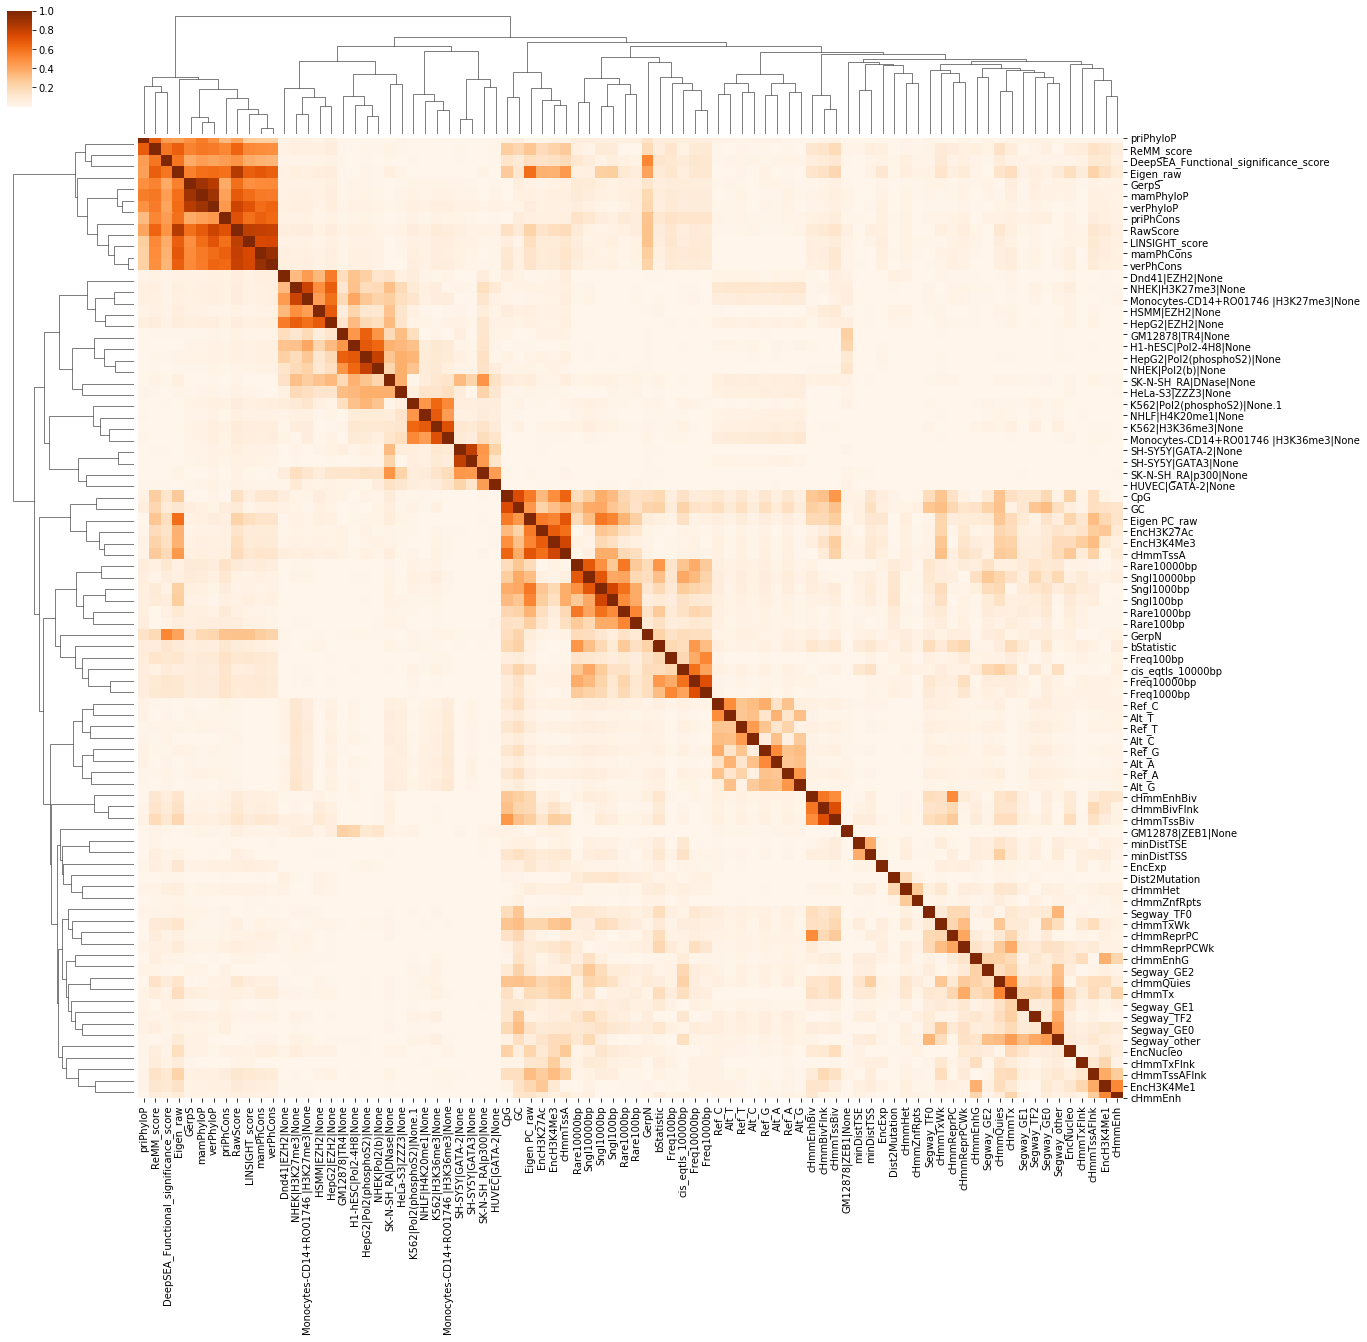

In [102]:
clustergrid = clustermap(corr_data, figsize=(20,20), cmap='Oranges', method='average', metric='euclidean') #which distance metric to use?

In [209]:
dissimilarity = 1 - np.abs(corr_data)
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.8, criterion='distance') #cluster on correlation > 0.2

features_clusters = sorted(list(zip(labels, corr_data.columns)), key=lambda x: x[0])

features_clusters_dict = {}
for x in features_clusters:
    if x[0] not in features_clusters_dict:
        features_clusters_dict[x[0]] = [x[1]]
    else:
        features_clusters_dict[x[0]].append(x[1])

for x in features_clusters_dict:
    print(x, features_clusters_dict[x])

1 ['Ref_A', 'Ref_G', 'Alt_A', 'Alt_G']
2 ['Ref_C', 'Ref_T', 'Alt_C', 'Alt_T']
3 ['K562|H3K36me3|None', 'NHLF|H4K20me1|None', 'K562|Pol2(phosphoS2)|None.1', 'Monocytes-CD14+RO01746\xa0|H3K36me3|None']
4 ['SH-SY5Y|GATA-2|None', 'SK-N-SH_RA|p300|None', 'SK-N-SH_RA|DNase|None', 'SH-SY5Y|GATA3|None', 'HUVEC|GATA-2|None']
5 ['NHEK|H3K27me3|None', 'Dnd41|EZH2|None', 'Monocytes-CD14+RO01746\xa0|H3K27me3|None', 'HSMM|EZH2|None', 'HepG2|EZH2|None']
6 ['HepG2|Pol2(phosphoS2)|None', 'H1-hESC|Pol2-4H8|None', 'HeLa-S3|ZZZ3|None', 'GM12878|TR4|None', 'NHEK|Pol2(b)|None']
7 ['GM12878|ZEB1|None']
8 ['cHmmHet', 'cHmmZnfRpts']
9 ['Dist2Mutation']
10 ['minDistTSE', 'minDistTSS']
11 ['GerpN', 'GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'priPhyloP', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen_raw', 'LINSIGHT_score']
12 ['EncH3K4Me1', 'cHmmEnh', 'cHmmTssAFlnk']
13 ['cHmmTxFlnk']
14 ['cHmmBivFlnk', 'cHmmEnhBiv', 'cHmmTssBiv']
15 ['cHmmReprPC', 'cHmmR

In [210]:
print(features_clusters_dict)

{1: ['Ref_A', 'Ref_G', 'Alt_A', 'Alt_G'], 2: ['Ref_C', 'Ref_T', 'Alt_C', 'Alt_T'], 3: ['K562|H3K36me3|None', 'NHLF|H4K20me1|None', 'K562|Pol2(phosphoS2)|None.1', 'Monocytes-CD14+RO01746\xa0|H3K36me3|None'], 4: ['SH-SY5Y|GATA-2|None', 'SK-N-SH_RA|p300|None', 'SK-N-SH_RA|DNase|None', 'SH-SY5Y|GATA3|None', 'HUVEC|GATA-2|None'], 5: ['NHEK|H3K27me3|None', 'Dnd41|EZH2|None', 'Monocytes-CD14+RO01746\xa0|H3K27me3|None', 'HSMM|EZH2|None', 'HepG2|EZH2|None'], 6: ['HepG2|Pol2(phosphoS2)|None', 'H1-hESC|Pol2-4H8|None', 'HeLa-S3|ZZZ3|None', 'GM12878|TR4|None', 'NHEK|Pol2(b)|None'], 7: ['GM12878|ZEB1|None'], 8: ['cHmmHet', 'cHmmZnfRpts'], 9: ['Dist2Mutation'], 10: ['minDistTSE', 'minDistTSS'], 11: ['GerpN', 'GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'priPhyloP', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen_raw', 'LINSIGHT_score'], 12: ['EncH3K4Me1', 'cHmmEnh', 'cHmmTssAFlnk'], 13: ['cHmmTxFlnk'], 14: ['cHmmBivFlnk', 'cHmmEnhBiv', 'cHmmTssBi

In [89]:
f = ['GerpN', 'GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'priPhyloP', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen_raw', 'LINSIGHT_score']
#sorted(list(zip(corr_data[x].index,  np.abs(corr_data[x]).tolist())), key=lambda x: x[1])[::-1]
print(f, '\n')

for x in f:
    print(x)
    correlations = [x[0] for x in list(zip(corr_data[x].index,  np.abs(corr_data[x]).tolist())) if x[1] > 0.3]
    print(correlations)
    print('\n')

['GerpN', 'GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'priPhyloP', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen_raw', 'LINSIGHT_score'] 

GerpN
['GerpN', 'DeepSEA_Functional_significance_score', 'Eigen_raw']


GerpS
['GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'priPhyloP', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen_raw', 'LINSIGHT_score']


mamPhCons
['GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen_raw', 'LINSIGHT_score']


mamPhyloP
['GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'priPhyloP', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen_raw', 'LINSIGHT_score']


priPhCons
['GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'priPhyloP', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significan

In [127]:
labels

array([21,  9, 23, 21, 12, 21, 22, 20, 20, 20, 21, 11, 11, 21, 21, 21, 21,
       21, 21, 20, 14, 12, 14, 17,  8, 18, 15, 15, 21, 12, 14, 18, 13, 21,
        8, 11, 11, 10, 10, 11, 11, 11, 11,  1,  2,  1,  2, 18, 19, 17, 16,
       18, 18,  1,  2,  1,  2, 20, 11, 11, 11, 11, 21, 11,  4,  3,  6,  4,
        3,  4,  4,  5,  6,  7,  5,  3,  6,  5,  6,  6,  3,  5,  5,  4],
      dtype=int32)

In [126]:
dissimilarity.shape[0]
dissimilarity = 1 - np.abs(corr_data)
hierarchy = linkage(squareform(dissimilarity), method='average')
# labels = fcluster(hierarchy, 0.8, criterion='distance') #cluster on correlation > 0.2
# hierarchy = linkage(squareform(dissimilarity), method='average')
hierarchy

# A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices 
# Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index 
# less than n corresponds to one of the original observations. The distance between 
# clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents
# the number of original observations in the newly formed cluster.

array([[3.50000000e+01, 4.10000000e+01, 7.65891806e-02, 2.00000000e+00],
       [3.60000000e+01, 4.20000000e+01, 9.84888312e-02, 2.00000000e+00],
       [1.20000000e+01, 8.50000000e+01, 1.36695266e-01, 3.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.60023543e-01, 2.00000000e+00],
       [6.40000000e+01, 7.00000000e+01, 1.91263121e-01, 2.00000000e+00],
       [6.60000000e+01, 7.90000000e+01, 2.00954359e-01, 2.00000000e+00],
       [7.10000000e+01, 7.70000000e+01, 2.18290571e-01, 2.00000000e+00],
       [5.00000000e+00, 2.80000000e+01, 2.29076340e-01, 2.00000000e+00],
       [1.70000000e+01, 1.80000000e+01, 2.31495600e-01, 2.00000000e+00],
       [6.30000000e+01, 8.40000000e+01, 2.45201211e-01, 3.00000000e+00],
       [8.70000000e+01, 9.30000000e+01, 2.62022930e-01, 5.00000000e+00],
       [0.00000000e+00, 1.00000000e+01, 2.63337782e-01, 2.00000000e+00],
       [2.00000000e+01, 3.00000000e+01, 2.71106577e-01, 2.00000000e+00],
       [7.00000000e+00, 8.00000000e+00, 2.76117452e

In [123]:
# dissimilarity.shape[0]
# dissimilarity = 1 - np.abs(corr_data)
# hierarchy = linkage(dissimilarity, method='average')
# labels = fcluster(hierarchy, 0.8, criterion='distance') #cluster on correlation > 0.2
# hierarchy = linkage(squareform(dissimilarity), method='average')
# labels

//anaconda3/envs/py3_vp/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


array([18, 44, 45, 19, 59, 19, 63, 25, 25, 27, 18, 29,  4, 21, 23, 24, 21,
       22, 22, 28, 38, 60, 39, 51, 42, 53, 47, 48, 19, 61, 38, 54, 62, 49,
       43,  5,  4, 40, 41,  5,  3,  5,  4, 36, 30, 34, 32, 55, 58, 52, 50,
       57, 56, 35, 33, 37, 31, 26,  5,  1,  2,  6, 20,  5, 15, 13,  9, 16,
       13, 11, 15,  7,  9, 46,  8, 14, 12,  7, 10,  9, 13,  7,  7, 17],
      dtype=int32)

In [104]:
dissimilarity

,CpG,Dist2Mutation,EncExp,EncH3K27Ac,EncH3K4Me1,EncH3K4Me3,EncNucleo,Freq10000bp,Freq1000bp,Freq100bp,...,Dnd41|EZH2|None,K562|Pol2(phosphoS2)|None.1,HeLa-S3|ZZZ3|None,Monocytes-CD14+RO01746 |H3K27me3|None,GM12878|TR4|None,NHEK|Pol2(b)|None,Monocytes-CD14+RO01746 |H3K36me3|None,HSMM|EZH2|None,HepG2|EZH2|None,HUVEC|GATA-2|None
CpG,0.000000,0.983096,0.940805,0.670443,0.979203,0.504382,0.760370,0.922192,0.914853,0.938596,...,0.937491,0.986160,0.983721,0.984137,0.977906,0.983482,0.995528,0.935563,0.972000,0.998614
Dist2Mutation,0.983096,0.000000,0.997975,0.994980,0.996797,0.996740,0.989113,0.963865,0.953777,0.963403,...,0.959610,0.999222,0.997438,0.993827,0.999903,0.999815,0.998764,0.965293,0.974940,0.997832
EncExp,0.940805,0.997975,0.000000,0.940219,0.971968,0.919646,0.994166,0.976504,0.986104,0.998294,...,0.999314,0.992421,0.996019,0.999380,0.995321,0.987632,0.999507,0.999081,0.997787,0.998591
EncH3K27Ac,0.670443,0.994980,0.940219,0.000000,0.721836,0.323480,0.900820,0.974548,0.991618,0.994882,...,0.985553,0.987438,0.986364,0.983146,0.960990,0.984388,0.990315,0.979101,0.978626,0.991468
EncH3K4Me1,0.979203,0.996797,0.971968,0.721836,0.000000,0.894594,0.881612,0.969114,0.965766,0.984947,...,0.990883,0.993863,0.992805,0.990280,0.997912,0.998247,0.986166,0.993625,0.997091,0.995802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NHEK|Pol2(b)|None,0.983482,0.999815,0.987632,0.984388,0.998247,0.963925,0.993517,0.999298,0.993820,0.998901,...,0.866807,0.705481,0.625624,0.768767,0.527715,0.000000,0.946865,0.886923,0.835658,0.934149
Monocytes-CD14+RO01746 |H3K36me3|None,0.995528,0.998764,0.999507,0.990315,0.986166,0.986448,0.981284,0.999795,0.996606,0.986702,...,0.978186,0.486576,0.833872,0.930866,0.999335,0.946865,0.000000,0.989792,0.961498,0.869948
HSMM|EZH2|None,0.935563,0.965293,0.999081,0.979101,0.993625,0.971591,0.966668,0.994841,0.995447,0.992358,...,0.661142,0.960043,0.872951,0.564276,0.932451,0.886923,0.989792,0.000000,0.317711,0.978751
HepG2|EZH2|None,0.972000,0.974940,0.997787,0.978626,0.997091,0.976629,0.966540,0.992122,0.993097,0.991228,...,0.437607,0.981433,0.870700,0.400623,0.868188,0.835658,0.961498,0.317711,0.000000,0.965001


In [249]:
top_features = ['GerpN', 'GerpS', 'mamPhCons', 'mamPhyloP', 'priPhCons', 'priPhyloP', 'verPhCons', 'verPhyloP', 'RawScore', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen_raw', 'LINSIGHT_score', 'Freq10000bp', 'Freq1000bp', 'Freq100bp', 'bStatistic', 'cis_eqtls_10000bp', 'CpG', 'EncH3K27Ac', 'EncH3K4Me3', 'GC', 'Rare10000bp', 'Rare1000bp', 'Rare100bp', 'Sngl10000bp', 'Sngl1000bp', 'Sngl100bp', 'cHmmTssA', 'cHmmTxWk', 'Eigen PC_raw']

In [ ]:
corr_data_top_features = data[top_features].corr().abs()

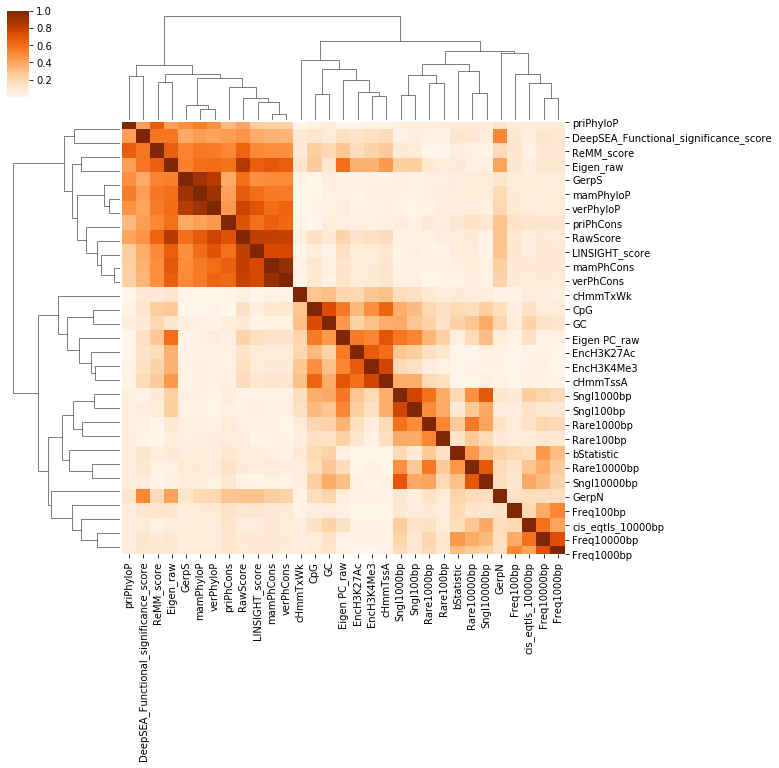

In [252]:
clustergrid = clustermap(corr_data_top_features, figsize=(10,10), cmap='Oranges', method='average', metric='euclidean') #which distance metric to use?

In [256]:
dissimilarity = 1 - np.abs(corr_data_top_features)
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.15, criterion='distance') #cluster on correlation > 0.2

features_clusters = sorted(list(zip(labels, corr_data_top_features.columns)), key=lambda x: x[0])

features_clusters_dict = {}
for x in features_clusters:
    if x[0] not in features_clusters_dict:
        features_clusters_dict[x[0]] = [x[1]]
    else:
        features_clusters_dict[x[0]].append(x[1])

for x in features_clusters_dict:
    print(x, features_clusters_dict[x])

1 ['GerpN']
2 ['DeepSEA_Functional_significance_score']
3 ['priPhyloP']
4 ['ReMM_score']
5 ['GerpS', 'mamPhyloP', 'verPhyloP']
6 ['RawScore']
7 ['Eigen_raw']
8 ['mamPhCons', 'verPhCons']
9 ['LINSIGHT_score']
10 ['priPhCons']
11 ['Freq10000bp']
12 ['Freq1000bp']
13 ['cis_eqtls_10000bp']
14 ['Freq100bp']
15 ['bStatistic']
16 ['Rare10000bp']
17 ['Sngl10000bp']
18 ['Sngl1000bp']
19 ['Sngl100bp']
20 ['Rare1000bp']
21 ['Rare100bp']
22 ['CpG']
23 ['GC']
24 ['EncH3K4Me3']
25 ['cHmmTssA']
26 ['EncH3K27Ac']
27 ['Eigen PC_raw']
28 ['cHmmTxWk']


In [257]:
print(features_clusters_dict)

{1: ['GerpN'], 2: ['DeepSEA_Functional_significance_score'], 3: ['priPhyloP'], 4: ['ReMM_score'], 5: ['GerpS', 'mamPhyloP', 'verPhyloP'], 6: ['RawScore'], 7: ['Eigen_raw'], 8: ['mamPhCons', 'verPhCons'], 9: ['LINSIGHT_score'], 10: ['priPhCons'], 11: ['Freq10000bp'], 12: ['Freq1000bp'], 13: ['cis_eqtls_10000bp'], 14: ['Freq100bp'], 15: ['bStatistic'], 16: ['Rare10000bp'], 17: ['Sngl10000bp'], 18: ['Sngl1000bp'], 19: ['Sngl100bp'], 20: ['Rare1000bp'], 21: ['Rare100bp'], 22: ['CpG'], 23: ['GC'], 24: ['EncH3K4Me3'], 25: ['cHmmTssA'], 26: ['EncH3K27Ac'], 27: ['Eigen PC_raw'], 28: ['cHmmTxWk']}


In [223]:
for x in features_clusters_dict:
    print(x, len(features_clusters_dict[x]))
#TODO:
# Write dict to file: clusternum: features
# First train on all features.
# Then loop over dict, for every cluster train on all features minus the current features. 
# OUTPUT: dict:

#     {all: [AUC, AUC, AUC, AUC, AUC],
#      1: aucs=[AUC, AUC, AUC, AUC, AUC], features=[xxx],
#      2: [AUC, AUC, AUC, AUC, AUC],
#      etc. 
#     }

# all: 95
# cluster1 permuted: 90      10
# cluster2 permuted: 92      8
# cluster3 permuted: 85      15

#  Visualize in barplot by loss: 1-AUC. Show barplot with error bars/pointplot from the folds. 
#     
# Report by
# We measure the error increase by 1-AUC (1 minus the area under the ROC curve).
#

1 9
2 5
3 6
4 11
5 2
6 3
7 2
8 3
9 14
10 4
11 2
12 7
13 3
14 7
15 6
16 14
17 2
18 2


In [84]:
plt.figure(figsize=(20,20))

NameError: name 'plt' is not defined

In [141]:
data2 = pd.read_csv('../data/data_model/data_noncoding.nctools-predictions.eqtls.deepsea-features.txt', sep='\t')

In [142]:
data2.columns.tolist()

['#Chrom',
 'Pos',
 'Ref',
 'Alt',
 'closest_gene_name_NCBoost',
 'annovar_genomic_region_NCBoost',
 'OMIM_diseases_NCBoost',
 'label_NCBoost_HGMD_DM_public',
 'label_NCBoost_ClinVar',
 'label_NCBoost_Smedley',
 'dataset',
 'Type',
 'Length',
 'AnnoType',
 'Consequence',
 'ConsScore',
 'ConsDetail',
 'GC',
 'CpG',
 'motifEName',
 'GeneID',
 'FeatureID',
 'GeneName',
 'CCDS',
 'Intron',
 'Exon',
 'minDistTSS',
 'minDistTSE',
 'priPhCons',
 'mamPhCons',
 'verPhCons',
 'priPhyloP',
 'mamPhyloP',
 'verPhyloP',
 'bStatistic',
 'cHmmTssA',
 'cHmmTssAFlnk',
 'cHmmTxFlnk',
 'cHmmTx',
 'cHmmTxWk',
 'cHmmEnhG',
 'cHmmEnh',
 'cHmmZnfRpts',
 'cHmmHet',
 'cHmmTssBiv',
 'cHmmBivFlnk',
 'cHmmEnhBiv',
 'cHmmReprPC',
 'cHmmReprPCWk',
 'cHmmQuies',
 'GerpN',
 'GerpS',
 'Segway',
 'EncH3K27Ac',
 'EncH3K4Me1',
 'EncH3K4Me3',
 'EncExp',
 'EncNucleo',
 'Dist2Mutation',
 'Freq100bp',
 'Rare100bp',
 'Sngl100bp',
 'Freq1000bp',
 'Rare1000bp',
 'Sngl1000bp',
 'Freq10000bp',
 'Rare10000bp',
 'Sngl10000bp',
 'Raw